In [5]:
from math import exp
from matt_axes_cust import nice_spines
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec as GS

# change some params
plt.rcParams.update({'xtick.labelsize':'10',
                     'ytick.labelsize':'10',
                     'axes.labelsize':'10',
                     'legend.numpoints':1,
                     'legend.frameon':False,
                     'font.sans-serif':['Arial']})


In [6]:
# def func
def model(y,t,stims,lead_in_sec,TauChr,TauRls):
    # stims should be 3d aRelaxRateay time|dur|intesity
    # if stimulus
    # go from time to index 
    tidx = int((t+lead_in_sec)*1000)
    tidx = len(stims)-1 if len(stims) <= tidx else tidx
    stim = stims[tidx,1]
    if stim!=0:
        return ((stim-y)/(TauChr))
    else:
        return ((stim-y)/(TauRls))

lead_in_sec = 2
lead_in = np.zeros(int(lead_in_sec*1000))
cls_phase = 0
opn_phase = 0.5


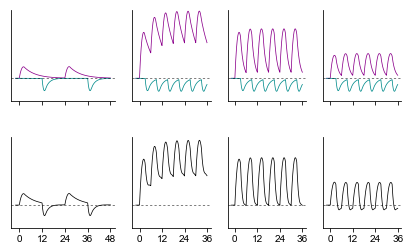

In [7]:
from matplotlib.gridspec import GridSpec as GS
gs = GS(2,4,width_ratios=[48/36,1,1,1],hspace=0.4)
for i,(CycleReps,Period,Amplitude,RelaxRate) in enumerate([(2,24,1,6),(6,6,4,6),(6,6,4,1.5),(6,6,2,1.5)]):
    ts = np.r_[-lead_in_sec:CycleReps*Period:0.001]
    # move from duty cycle to time for contractions
    cls_time = 3*1000
    opn_time = 2*1000
    cls_cycle = np.zeros(int(Period*1000))
    cls_slice = slice(*list(map(int,[cls_phase*Period*1000,(cls_phase*Period*1000)+(cls_time)])))
    cls_cycle[cls_slice] = np.linspace(1,0,cls_slice.stop-cls_slice.start)
    cls_stims = np.c_[np.linspace(-lead_in_sec,CycleReps*Period,len(lead_in)+len(cls_cycle)*CycleReps),
                  np.r_[lead_in,
                  np.tile(cls_cycle,(CycleReps,))]]

    opn_cycle = np.zeros(int(Period*1000))
    opn_slice = slice(*list(map(int,[opn_phase*Period*1000,(opn_phase*Period*1000)+(opn_time)])))
    opn_cycle[opn_slice] = np.linspace(-1,0,opn_slice.stop-opn_slice.start)
    opn_stims = np.c_[np.linspace(-lead_in_sec,CycleReps*Period,len(lead_in)+len(opn_cycle)*CycleReps),
                np.r_[lead_in,
                    np.tile(opn_cycle,(CycleReps,))]]
    cls = odeint(model, 0, ts, 
                 args=(cls_stims*Amplitude,
                       lead_in_sec,
                       4,RelaxRate), 
                 hmax = 0.5)
    opn = odeint(model, 0, ts, 
                 args=(opn_stims*0.75,
                       lead_in_sec,
                       1.5,2), 
                 hmax = 0.5)
    plt.subplot(gs[0,i]).plot(ts,cls,'-',
                color = 'darkmagenta', linewidth = 0.75)
    plt.subplot(gs[0,i]).plot(ts,opn,'-',
                color = 'darkcyan', linewidth = 0.75)
    plt.subplot(gs[0,i]).axhline(0,color = 'black',linewidth = 0.5, linestyle = ':', label = '')
    plt.subplot(gs[1,i]).plot(ts,opn+cls,color = 'black',linewidth = 0.75)
    plt.subplot(gs[1,i]).axhline(0,color = 'black',linewidth = 0.5, linestyle = ':', label = '')
    plt.subplot(gs[0,i]).xaxis.set_ticklabels([])
    if i==0:
        xticks = np.r_[0:49:12]
    else:
        xticks = np.r_[0:37:12]
    [plt.subplot(gs[j,i]).xaxis.set_ticks(xticks) for j in range(2)]
f = plt.gcf()
[ax.set_ylim(-0.5,1.5) for ax in f.axes]
[ax.yaxis.set_ticks([]) for ax in f.axes]
[ax.spines[loc].set_visible(False) for loc in ['top','right'] for ax in f.axes]
f.set_size_inches(7,4)
f.savefig('closer_model.pdf',transparent = True)

In [4]:
for extension in ['png','pdf','ps','eps','svg']:
    f.savefig('ColserModel.%s' % extension, dpi = 300,transparent=True)